In [1]:
import pandas as pd
df = pd.read_csv('./Salary_Dataset_with_Extra_Features.csv')
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

In [2]:
columns = df['Job Roles'].unique()
print((columns))

['Android' 'Backend' 'Database' 'Frontend' 'IOS' 'Java' 'Mobile' 'SDE'
 'Python' 'Web' 'Testing']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22769 entries, 0 to 22768
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22769 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22769 non-null  object 
 3   Salary             22769 non-null  int64  
 4   Salaries Reported  22769 non-null  int64  
 5   Location           22769 non-null  object 
 6   Employment Status  22769 non-null  object 
 7   Job Roles          22769 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [5]:
df.shape

(22769, 8)

In [6]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [7]:
array = [df['Job Roles'].unique(),
df['Job Title'].unique(),
df['Company Name'].unique(),
df['Location'].unique()]
print((array[2]))

['Sasken' 'Advanced Millennium Technologies' 'Unacademy' ...
 'Unicon Systems' 'Expert Solutions' 'Nextgen Innovation Labs']


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
#Handiling categorical values 

In [10]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
'''for i in df.columns:
    df[[i]].boxplot()
    plt.show()'''

'for i in df.columns:\n    df[[i]].boxplot()\n    plt.show()'

In [13]:
df.describe()

,Rating,Salary,Salaries Reported
count,22769.000000,2.276900e+04,22769.000000
mean,3.918209,6.953656e+05,1.855813
std,0.519686,8.844124e+05,6.823816
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


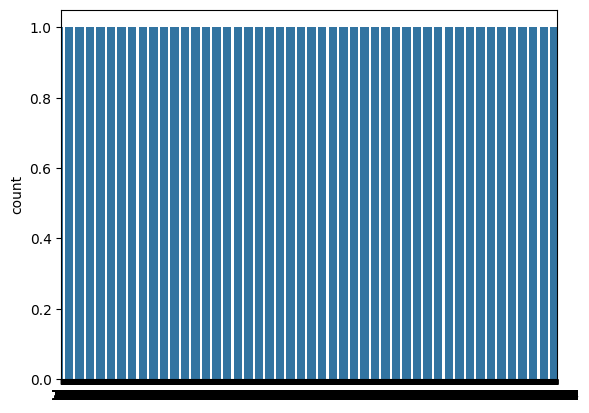

In [14]:
sns.countplot(df['Salary'])
plt.show()

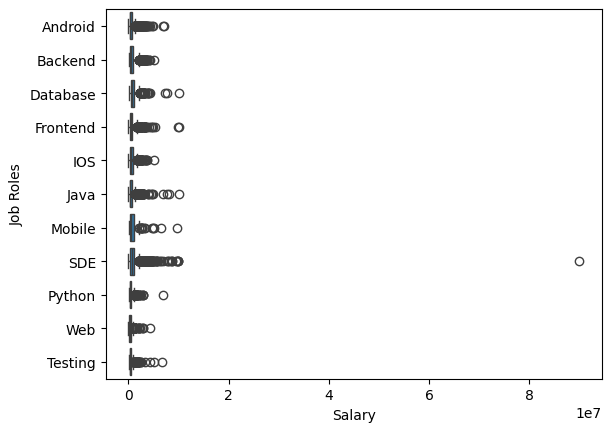

In [15]:
sns.boxplot(x='Salary',y='Job Roles',data=df)
plt.show()

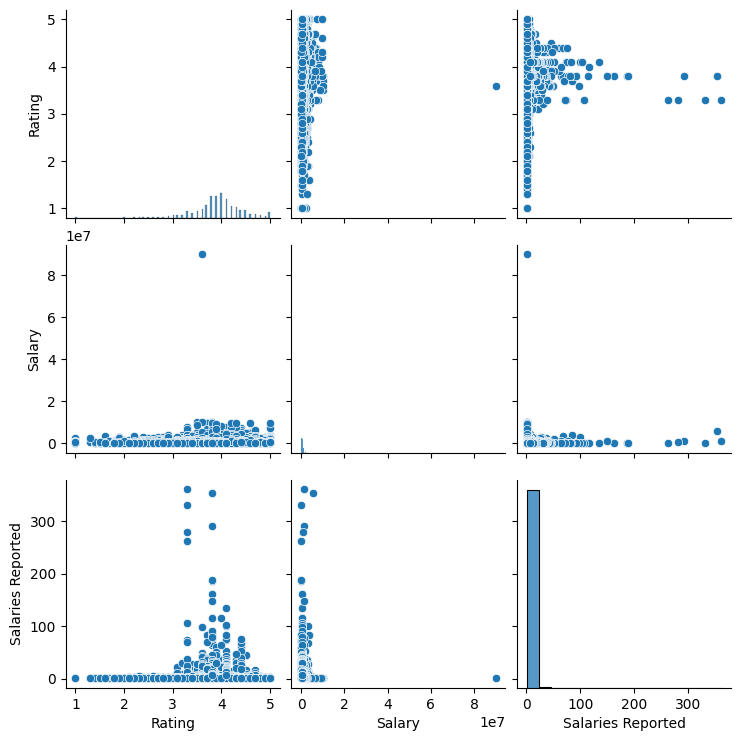

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
label = LabelEncoder()
df['Employment Status'] = label.fit_transform(df['Employment Status'])
df['Job Roles'] = label.fit_transform(df['Job Roles'])
df['Location'] = label.fit_transform(df['Location'])
df['Company Name'] =label.fit_transform(df['Company Name'])
df['Job Title'] = label.fit_transform(df['Job Title'])

In [18]:
x = df.drop(['Salary'],axis= 1)
y = df['Salary']

In [19]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.2,shuffle = True)
print(len(x_train),len(x_test))

18215 4554


In [21]:
#model building

In [22]:
from  sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
#Decision tree

In [34]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)
y_train_pred = dtr.predict(x_train)
y_test_pred = dtr.predict(x_test)
r2_score(y_train,y_train_pred)*100
r2_score(y_test,y_test_pred)*100

99.88812025797158

In [25]:
#Randomforest

In [33]:
rdr = RandomForestRegressor(n_estimators=100,random_state=42)
rdr.fit(x_train,y_train)
y_train_pred = rdr.predict(x_train)
y_test_pred = rdr.predict(x_test)
r2_score(y_train,y_train_pred)*100
r2_score(y_test,y_test_pred)*100


85.79033241617326

In [ ]:
#XGBOOST

In [28]:
import xgboost as xgb

In [32]:
xg = xgb.XGBRegressor()
xg.fit(x_train,y_train)
y_train_pred = xg.predict(x_train)
y_test_pred = xg.predict(x_test)
r2_score(y_train,y_train_pred)*100
r2_score(y_test,y_test_pred)*100


72.02815290896447

In [ ]:
#linear regression 

In [35]:
from sklearn.linear_model import LinearRegression

In [37]:
reg = LinearRegression()
reg.fit(x_train,y_train)
r2_score(y_train,y_train_pred)*100
r2_score(y_test,y_test_pred)*100


99.88812025797158

In [40]:
df.tail()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22764,4.7,3142,1071,200000,1,0,1,10
22765,4.0,6373,1071,300000,1,0,1,10
22766,4.1,3444,264,192000,13,0,1,10
22767,4.1,313,264,300000,7,0,1,10
22768,3.8,9486,91,300000,7,0,1,10


In [51]:
# performing hypertuning 

In [52]:
param_grid_rf={
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10]
}

In [53]:
param_grid_dt={
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10]
}

In [54]:
rf_regressor = RandomForestRegressor(random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)

In [55]:
grid_search_rf = GridSearchCV(estimator=rf_regressor,param_grid=param_grid_rf,scoring = 'neg_mean_squared_error',cv=5)
grid_search_dt = GridSearchCV(estimator=dt_regressor,param_grid=param_grid_dt,scoring='neg_mean_squared_error',cv=5)

In [56]:
grid_search_rf.fit(x_train,y_train)
grid_search_dt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [62]:
best_params_rf = grid_search_rf.best_params_
best_params_dt = grid_search_dt.best_params_

y_pred_rf = grid_search_rf.best_estimator_.predict(x_test)
r2_rf = r2_score(y_test,y_pred_rf)
#mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

y_pred_dt = grid_search_dt.best_estimator_.predict(x_test)
r2_dt = r2_score(y_test,y_pred_dt)
#mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f'Best Hyperparameters for Random Forest: {best_params_rf}')
print(f'R-squared (R2) Score for Random Forest: {r2_rf}')
#print(f'MAE for Random Forest: {mae_rf:.4f}')
print(f'MSE for Random Forest: {mse_rf:.4f}\n')

print(f'Best Hyperparameters for Decision Tree: {best_params_dt}')
print(f'R-squared (R2) Score for Decision Tree: {r2_dt}')
#print(f'MAE for Decision Tree: {mae_dt:.4f}')
print(f'MSE for Decision Tree: {mse_dt:.4f}\n')

Best Hyperparameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
R-squared (R2) Score for Random Forest: 0.12424383165657282
MSE for Random Forest: 344493730655.6772

Best Hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
R-squared (R2) Score for Decision Tree: 0.11511080577594823
MSE for Decision Tree: 348086363253.1075



In [63]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(grid_search_rf.best_estimator_, file)


In [64]:
grid_search_rf.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=200,
                      random_state=42)